In [2]:
# Doanload The Kaggle Data

#!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18599/1236839/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1615367641&Signature=lK%2FoRC3BSaiJmWmZcczeJ68Ug7Pw23UgLB1QQvMs3VDMevBS57EIA1ykGglZPToInIWxJqyezSCX0zmkdwizJb7LNGrd62p4n6PgkG%2FXoLj9eTZjXQE8uoqK4pyC0wKqrnvB%2BB6r06i6j4YyHckvlmn3yYx0cwJuDrp4H%2F81FBlvEjCkCpbxOzFcXtjcnqzuqF%2FVKOCBgJD8XKfVDb2csViBt5VB1mW6vix2kU9YFnSzy8tklmITZ9sfm5j055GeXNVhLCZvV4J97IpRHbxaNjUfoj3d5EueIpPEpJ%2BcwQO3UU593nVjlOUTda3OJqvnZ91frVDqvrpGW5VBNeGapg%3D%3D&response-content-disposition=attachment%3B+filename%3Dm5-forecasting-accuracy.zip" -c -O 'm5-forecasting-accuracy.zip'

In [ ]:
# Refrence Notebook

#https://www.kaggle.com/qcw171717/naive-baseline/

In [4]:
#!unzip m5-forecasting-accuracy.zip

In [5]:
# import sum Libaries

import numpy as np
import pandas as pd
from tqdm import tqdm

In [85]:
df = pd.read_csv('sales_train_evaluation.csv')
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


In [86]:
IDS = df['id']

In [7]:
df.shape

(30490, 1947)

In [8]:
price_df = pd.read_csv("sell_prices.csv")
price_df.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [9]:
price_df.shape

(6841121, 4)

In [10]:
cal_df = pd.read_csv("calendar.csv")
cal_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [11]:
cal_df.shape

(1969, 14)

In [12]:
# Get integer value in d column    ex d_1 , d_2   ---->>>   1  ,1

cal_df["d"]=cal_df["d"].apply(lambda x: int(x.split("_")[1]))
cal_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,5,NaN,NaN,NaN,NaN,1,0,1


In [13]:
price_df["id"] = price_df["item_id"] + "_" + price_df["store_id"] + "_evaluation"
price_df.head()

,store_id,item_id,wm_yr_wk,sell_price,id
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES_1_001_CA_1_evaluation
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES_1_001_CA_1_evaluation
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES_1_001_CA_1_evaluation
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES_1_001_CA_1_evaluation
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES_1_001_CA_1_evaluation


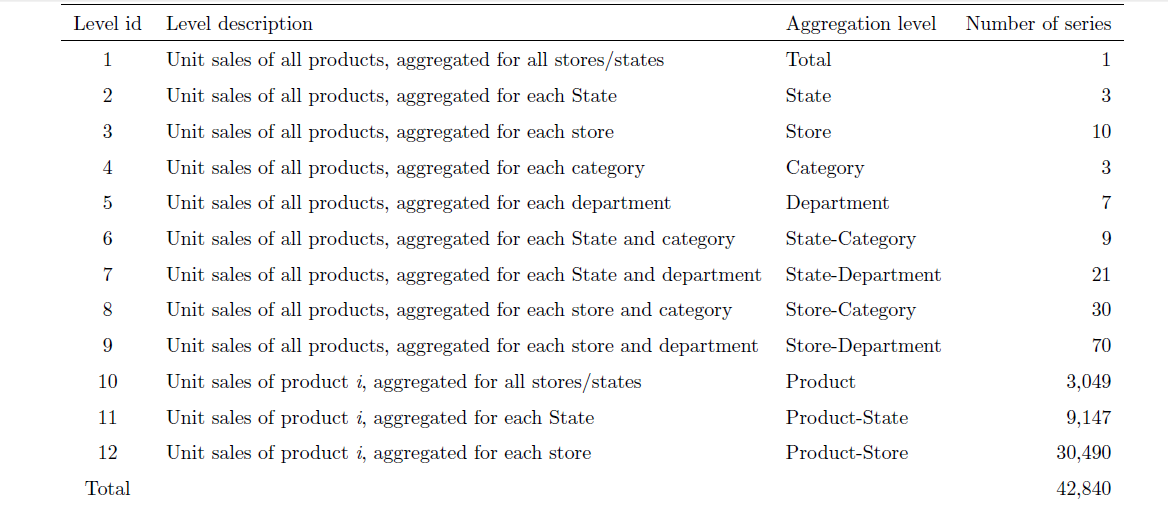

### 1. Calculate Weight For Product-Store Level  **{Level- 12}**

In [14]:
for day in tqdm(range(1886, 1914)):
    # Get the Week Id of Particular Day
    wk_id = list(cal_df[cal_df["d"]==day]["wm_yr_wk"])[0]
    # Get All Price Information on that Paricular Day
    wk_price_df = price_df[price_df["wm_yr_wk"]==wk_id]
    # Merge Sell Price With Transaction data
    df = df.merge(wk_price_df[["sell_price", "id"]], on=["id"], how='inner')
    # Sales Revnue = Number of Product Sold * Product Price
    df["Sales_Revenue" + str(day)] = df["sell_price"] * df["d_" + str(day)]
    df.drop(columns=["sell_price"], inplace=True)

100%|██████████| 28/28 [00:08<00:00,  3.36it/s]


In [15]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,Sales_Revenue1886,Sales_Revenue1887,Sales_Revenue1888,Sales_Revenue1889,Sales_Revenue1890,Sales_Revenue1891,Sales_Revenue1892,Sales_Revenue1893,Sales_Revenue1894,Sales_Revenue1895,Sales_Revenue1896,Sales_Revenue1897,Sales_Revenue1898,Sales_Revenue1899,Sales_Revenue1900,Sales_Revenue1901,Sales_Revenue1902,Sales_Revenue1903,Sales_Revenue1904,Sales_Revenue1905,Sales_Revenue1906,Sales_Revenue1907,Sales_Revenue1908,Sales_Revenue1909,Sales_Revenue1910,Sales_Revenue1911,Sales_Revenue1912,Sales_Revenue1913
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,4,0,0,0,0,3,3,0,1,8.26,0.0,0.00,0.00,0.00,0.00,8.26,0.00,33.04,16.52,24.78,0.00,8.38,16.76,0.00,0.0,0.00,8.38,8.38,25.14,0.00,8.38,8.38,8.38,25.14,0.00,8.38,8.38
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,1,1,0,0,0,0,0,3.97,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.97,0.00,0.00,0.00,0.00
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,0,2,3,0,1,0.00,0.0,0.00,0.00,0.00,0.00,2.97,0.00,0.00,0.00,2.97,0.00,0.00,0.00,0.00,0.0,2.97,5.94,5.94,2.97,5.94,2.97,2.97,2.97,0.00,2.97,2.97,2.97
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,4,0,1,3,0,2,6,0.00,0.0,0.00,0.00,13.92,4.64,9.28,4.64,13.92,4.64,0.00,9.28,23.20,18.56,9.28,0.0,13.92,0.00,4.64,0.00,23.20,18.56,4.64,0.00,4.64,13.92,32.48,9.28
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,2,1,0,0,2,1,0,2.88,0.0,11.52,11.52,0.00,2.88,11.52,0.00,2.88,0.00,2.88,0.00,2.88,2.88,5.76,0.0,2.88,2.88,5.76,2.88,2.88,0.00,2.88,2.88,5.76,5.76,5.76,11.52


In [16]:
# Get 28 Days Total Revnue by Particular Product

df["dollar_sales"] = df[[c for c in df.columns if c.find("Sales_Revenue")==0]].sum(axis=1)
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,Sales_Revenue1886,Sales_Revenue1887,Sales_Revenue1888,Sales_Revenue1889,Sales_Revenue1890,Sales_Revenue1891,Sales_Revenue1892,Sales_Revenue1893,Sales_Revenue1894,Sales_Revenue1895,Sales_Revenue1896,Sales_Revenue1897,Sales_Revenue1898,Sales_Revenue1899,Sales_Revenue1900,Sales_Revenue1901,Sales_Revenue1902,Sales_Revenue1903,Sales_Revenue1904,Sales_Revenue1905,Sales_Revenue1906,Sales_Revenue1907,Sales_Revenue1908,Sales_Revenue1909,Sales_Revenue1910,Sales_Revenue1911,Sales_Revenue1912,Sales_Revenue1913,dollar_sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,4,0,0,0,0,3,3,0,1,8.26,0.0,0.00,0.00,0.00,0.00,8.26,0.00,33.04,16.52,24.78,0.00,8.38,16.76,0.00,0.0,0.00,8.38,8.38,25.14,0.00,8.38,8.38,8.38,25.14,0.00,8.38,8.38,224.94
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,1,1,0,0,0,0,0,3.97,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.97,0.00,0.00,0.00,0.00,7.94
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,2,3,0,1,0.00,0.0,0.00,0.00,0.00,0.00,2.97,0.00,0.00,0.00,2.97,0.00,0.00,0.00,0.00,0.0,2.97,5.94,5.94,2.97,5.94,2.97,2.97,2.97,0.00,2.97,2.97,2.97,47.52
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,4,0,1,3,0,2,6,0.00,0.0,0.00,0.00,13.92,4.64,9.28,4.64,13.92,4.64,0.00,9.28,23.20,18.56,9.28,0.0,13.92,0.00,4.64,0.00,23.20,18.56,4.64,0.00,4.64,13.92,32.48,9.28,236.64
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,2,1,0,0,2,1,0,2.88,0.0,11.52,11.52,0.00,2.88,11.52,0.00,2.88,0.00,2.88,0.00,2.88,2.88,5.76,0.0,2.88,2.88,5.76,2.88,2.88,0.00,2.88,2.88,5.76,5.76,5.76,11.52,109.44


In [17]:
# Drop all the Revenues Columns

df.drop(columns=[c for c in df.columns if c.find("unit_sales")==0], inplace=True)

In [18]:
# Product Contribution in the Revenue

df["weight"] = df["dollar_sales"] / df["dollar_sales"].sum()
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,Sales_Revenue1886,Sales_Revenue1887,Sales_Revenue1888,Sales_Revenue1889,Sales_Revenue1890,Sales_Revenue1891,Sales_Revenue1892,Sales_Revenue1893,Sales_Revenue1894,Sales_Revenue1895,Sales_Revenue1896,Sales_Revenue1897,Sales_Revenue1898,Sales_Revenue1899,Sales_Revenue1900,Sales_Revenue1901,Sales_Revenue1902,Sales_Revenue1903,Sales_Revenue1904,Sales_Revenue1905,Sales_Revenue1906,Sales_Revenue1907,Sales_Revenue1908,Sales_Revenue1909,Sales_Revenue1910,Sales_Revenue1911,Sales_Revenue1912,Sales_Revenue1913,dollar_sales,weight
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1,8.26,0.0,0.00,0.00,0.00,0.00,8.26,0.00,33.04,16.52,24.78,0.00,8.38,16.76,0.00,0.0,0.00,8.38,8.38,25.14,0.00,8.38,8.38,8.38,25.14,0.00,8.38,8.38,224.94,0.000060
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0,3.97,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.97,0.00,0.00,0.00,0.00,7.94,0.000002
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1,0.00,0.0,0.00,0.00,0.00,0.00,2.97,0.00,0.00,0.00,2.97,0.00,0.00,0.00,0.00,0.0,2.97,5.94,5.94,2.97,5.94,2.97,2.97,2.97,0.00,2.97,2.97,2.97,47.52,0.000013
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6,0.00,0.0,0.00,0.00,13.92,4.64,9.28,4.64,13.92,4.64,0.00,9.28,23.20,18.56,9.28,0.0,13.92,0.00,4.64,0.00,23.20,18.56,4.64,0.00,4.64,13.92,32.48,9.28,236.64,0.000063
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0,2.88,0.0,11.52,11.52,0.00,2.88,11.52,0.00,2.88,0.00,2.88,0.00,2.88,2.88,5.76,0.0,2.88,2.88,5.76,2.88,2.88,0.00,2.88,2.88,5.76,5.76,5.76,11.52,109.44,0.000029


In [19]:
df.drop(columns=["dollar_sales"], inplace=True)

In [20]:
df["weight"] /= 12

### 2. Forecasting Next 28 days Using Simple Moving Average

In [21]:
all_days_col = [h for h in df.columns if 'd_' in h]
print("First 5 values ",all_days_col[0:5])
print("Last 5 values ",all_days_col[-5:])

First 5 values  ['d_1', 'd_2', 'd_3', 'd_4', 'd_5']
Last 5 values  ['d_1937', 'd_1938', 'd_1939', 'd_1940', 'd_1941']


In [22]:
train_data = df[all_days_col[:1913]]
train_data.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [23]:
val_data = df[all_days_col[1913:]]
val_data.head()

,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


In [24]:
def simple_Moving_Average(train_data,  forecast_days,window_Size):

    predictions = []
    for i in range(forecast_days):
        # All Data Avilabel in Trainin Data
        if i == 0:
            predictions.append(np.mean(train_data[train_data.columns[-window_Size:]].values, axis=1))
        if i < forecast_days and i > 0:
            predictions.append((np.sum(train_data[train_data.columns[-window_Size + i:]].values, axis=1) + \
                                  np.sum(predictions[:i], axis=0))/forecast_days)
            
    return predictions

In [25]:
forecast_days = 28
window_Size = 28
predictions = simple_Moving_Average(train_data, forecast_days, window_Size)

In [26]:
for d, i in enumerate(range(1914, 1942)):
    df['F_' + str(i)] = predictions[d]

In [27]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,Sales_Revenue1903,Sales_Revenue1904,Sales_Revenue1905,Sales_Revenue1906,Sales_Revenue1907,Sales_Revenue1908,Sales_Revenue1909,Sales_Revenue1910,Sales_Revenue1911,Sales_Revenue1912,Sales_Revenue1913,weight,F_1914,F_1915,F_1916,F_1917,F_1918,F_1919,F_1920,F_1921,F_1922,F_1923,F_1924,F_1925,F_1926,F_1927,F_1928,F_1929,F_1930,F_1931,F_1932,F_1933,F_1934,F_1935,F_1936,F_1937,F_1938,F_1939,F_1940,F_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.38,8.38,25.14,0.00,8.38,8.38,8.38,25.14,0.00,8.38,8.38,5.001094e-06,0.964286,0.963010,0.997403,1.033025,1.069919,1.108130,1.147706,1.152981,1.194159,1.093951,1.061592,0.992363,1.027804,1.028798,0.994112,1.029616,1.066388,1.104473,1.108204,1.112069,1.044642,1.081951,1.084878,1.087909,1.091049,1.022872,1.059403,1.061525
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,3.97,0.00,0.00,0.00,0.00,1.765301e-07,0.071429,0.038265,0.039632,0.041047,0.042513,0.044032,0.045604,0.047233,0.048920,0.050667,0.052477,0.054351,0.056292,0.058302,0.060384,0.062541,0.064775,0.067088,0.069484,0.071966,0.074536,0.077198,0.079955,0.082810,0.050054,0.051841,0.053693,0.055610
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5.94,5.94,2.97,5.94,2.97,2.97,2.97,0.00,2.97,2.97,2.97,1.056513e-06,0.571429,0.591837,0.612974,0.634866,0.657539,0.681023,0.705345,0.694822,0.719637,0.745338,0.771957,0.763813,0.791092,0.819345,0.848608,0.878915,0.910305,0.907102,0.868070,0.827643,0.821488,0.779398,0.771520,0.763359,0.754908,0.781869,0.774079,0.766010
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,4.64,0.00,23.20,18.56,4.64,0.00,4.64,13.92,32.48,9.28,5.261220e-06,1.821429,1.886480,1.953854,2.023634,2.095907,2.063618,2.101604,2.105233,2.144706,2.114159,2.153951,2.230878,2.239123,2.140521,2.074111,2.076757,2.150927,2.120603,2.196339,2.239065,2.319032,2.223283,2.159829,2.201252,2.279868,2.325577,2.301491,2.133687
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.88,5.76,2.88,2.88,0.00,2.88,2.88,5.76,5.76,5.76,11.52,2.433181e-06,1.357143,1.369898,1.418823,1.326638,1.231161,1.275131,1.284957,1.187991,1.230419,1.238649,1.282886,1.292989,1.339167,1.351280,1.363826,1.341106,1.389002,1.402895,1.417284,1.396473,1.410633,1.425298,1.476202,1.493209,1.510824,1.493353,1.475258,1.456518


In [ ]:
# --->> Level 12 Ground Truth Vaulues And Forecasting Values we have.

### 3. Focus on Higher Level Aggregating

###### Level 1. Aggregation of Total

In [28]:
data = df[[a for a in df.columns if a.find("d_") == 0 or a.find("F_") == 0]]
# Get All Columns Sum
data = data.sum()
# Transpose the data
aggregated_df = pd.DataFrame(data).transpose()
aggregated_df

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,F_1914,F_1915,F_1916,F_1917,F_1918,F_1919,F_1920,F_1921,F_1922,F_1923,F_1924,F_1925,F_1926,F_1927,F_1928,F_1929,F_1930,F_1931,F_1932,F_1933,F_1934,F_1935,F_1936,F_1937,F_1938,F_1939,F_1940,F_1941
0,32631.0,31749.0,23783.0,25412.0,19146.0,29211.0,28010.0,37932.0,32736.0,25572.0,23071.0,23658.0,23756.0,26445.0,34833.0,36380.0,21804.0,24070.0,21443.0,20318.0,23721.0,31689.0,29283.0,23966.0,20501.0,20757.0,20277.0,22529.0,29908.0,28707.0,21240.0,22872.0,22046.0,23475.0,23572.0,31202.0,34876.0,24562.0,22752.0,22560.0,...,42248.0,40503.0,44073.0,54308.0,59921.0,42362.0,38777.0,37096.0,36963.0,42552.0,51518.0,54338.0,42272.357143,42494.905612,42803.402241,43176.416607,43479.824343,43406.389498,43075.474837,42598.706081,42676.588442,42783.502314,42913.841683,43085.193172,43080.378642,42606.820736,42205.064334,42197.13806,42308.857277,42562.995037,42742.780574,42776.844165,42577.374314,42253.709111,42403.520151,42576.145871,42834.472509,43113.096527,43205.81426,43000.236198


In [29]:
aggregated_df["level"] = 1
aggregated_df["weight"] = 1/12  
aggregated_df

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,F_1914,F_1915,F_1916,F_1917,F_1918,F_1919,F_1920,F_1921,F_1922,F_1923,F_1924,F_1925,F_1926,F_1927,F_1928,F_1929,F_1930,F_1931,F_1932,F_1933,F_1934,F_1935,F_1936,F_1937,F_1938,F_1939,F_1940,F_1941,level,weight
0,32631.0,31749.0,23783.0,25412.0,19146.0,29211.0,28010.0,37932.0,32736.0,25572.0,23071.0,23658.0,23756.0,26445.0,34833.0,36380.0,21804.0,24070.0,21443.0,20318.0,23721.0,31689.0,29283.0,23966.0,20501.0,20757.0,20277.0,22529.0,29908.0,28707.0,21240.0,22872.0,22046.0,23475.0,23572.0,31202.0,34876.0,24562.0,22752.0,22560.0,...,44073.0,54308.0,59921.0,42362.0,38777.0,37096.0,36963.0,42552.0,51518.0,54338.0,42272.357143,42494.905612,42803.402241,43176.416607,43479.824343,43406.389498,43075.474837,42598.706081,42676.588442,42783.502314,42913.841683,43085.193172,43080.378642,42606.820736,42205.064334,42197.13806,42308.857277,42562.995037,42742.780574,42776.844165,42577.374314,42253.709111,42403.520151,42576.145871,42834.472509,43113.096527,43205.81426,43000.236198,1,0.083333


In [ ]:
# we will Give Each Level Around 8.3% Weight

##### Level-2 To Level-11 Aggregation

In [30]:
aggregation_level = {2: ["state_id"], 
                     3: ["store_id"], 
                     4: ["cat_id"], 
                     5: ["dept_id"], 
                     6: ["state_id", "cat_id"], 
                     7: ["state_id", "dept_id"], 
                     8: ["store_id", "cat_id"], 
                     9: ["store_id", "dept_id"],
                     10: ["item_id"], 
                     11: ["item_id", "state_id"]}

In [31]:
columns = aggregated_df.columns 

for lev in aggregation_level:
    # Group by Based on Aggregation Level
    new_df = df.groupby(by=aggregation_level[lev]).sum().reset_index()
    # Add Level Column
    new_df["level"] = lev
    # Append your new DataFrame into old DataFrame
    aggregated_df = aggregated_df.append(new_df[columns])

In [32]:
aggregated_df

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,F_1914,F_1915,F_1916,F_1917,F_1918,F_1919,F_1920,F_1921,F_1922,F_1923,F_1924,F_1925,F_1926,F_1927,F_1928,F_1929,F_1930,F_1931,F_1932,F_1933,F_1934,F_1935,F_1936,F_1937,F_1938,F_1939,F_1940,F_1941,level,weight
0,32631.0,31749.0,23783.0,25412.0,19146.0,29211.0,28010.0,37932.0,32736.0,25572.0,23071.0,23658.0,23756.0,26445.0,34833.0,36380.0,21804.0,24070.0,21443.0,20318.0,23721.0,31689.0,29283.0,23966.0,20501.0,20757.0,20277.0,22529.0,29908.0,28707.0,21240.0,22872.0,22046.0,23475.0,23572.0,31202.0,34876.0,24562.0,22752.0,22560.0,...,44073.0,54308.0,59921.0,42362.0,38777.0,37096.0,36963.0,42552.0,51518.0,54338.0,42272.357143,42494.905612,42803.402241,43176.416607,43479.824343,43406.389498,43075.474837,42598.706081,42676.588442,42783.502314,42913.841683,43085.193172,43080.378642,42606.820736,42205.064334,42197.138060,42308.857277,42562.995037,42742.780574,42776.844165,42577.374314,42253.709111,42403.520151,42576.145871,42834.472509,43113.096527,43205.814260,43000.236198,1,8.333333e-02
0,14195.0,13805.0,10108.0,11047.0,9925.0,11322.0,12251.0,16610.0,14696.0,11822.0,10933.0,10350.0,11204.0,11354.0,14610.0,15630.0,9044.0,9496.0,8844.0,7835.0,10025.0,13870.0,13465.0,11997.0,9130.0,8941.0,8514.0,9847.0,13652.0,12491.0,9196.0,9782.0,9537.0,9710.0,10444.0,13784.0,16057.0,10953.0,10299.0,9951.0,...,18471.0,23037.0,24704.0,17721.0,16150.0,15678.0,16297.0,17430.0,23103.0,24644.0,18006.107143,18096.253827,18195.441463,18332.707230,18430.268202,18412.706352,18278.481579,18053.534493,18048.553582,18107.573353,18189.736687,18287.262997,18307.736675,18129.048699,17917.121867,17932.376220,18030.246799,18152.255613,18262.371885,18334.063738,18254.423157,18083.795413,18120.645249,18204.096865,18313.243182,18449.859010,18498.246831,18379.112790,2,3.686428e-02
1,9438.0,9630.0,6778.0,7381.0,5912.0,9006.0,6226.0,9440.0,9376.0,7319.0,6224.0,6740.0,6109.0,7202.0,10081.0,11725.0,6719.0,7460.0,6606.0,6412.0,6711.0,9150.0,9789.0,7297.0,6628.0,5814.0,6175.0,6286.0,8586.0,9086.0,6555.0,7082.0,6145.0,6639.0,6584.0,9238.0,10423.0,7623.0,6335.0,6941.0,...,12320.0,12366.0,16249.0,12228.0,11370.0,10375.0,9162.0,12303.0,13681.0,14815.0,11046.571429,11073.127551,11171.382106,11255.074325,11324.684122,11305.851412,11241.953248,11141.630150,11164.652655,11189.604536,11220.018983,11242.162518,11259.168323,11184.138620,11090.072142,11087.074719,11110.970244,11161.576324,11192.632622,11206.655215,11161.892902,11070.924791,11113.886391,11120.739476,11175.051600,11231.232014,11253.240301,11217.070311,2,2.244138e-02
2,8998.0,8314.0,6897.0,6984.0,3309.0,8883.0,9533.0,11882.0,8664.0,6431.0,5914.0,6568.0,6443.0,7889.0,10142.0,9025.0,6041.0,7114.0,5993.0,6071.0,6985.0,8669.0,6029.0,4672.0,4743.0,6002.0,5588.0,6396.0,7670.0,7130.0,5489.0,6008.0,6364.0,7126.0,6544.0,8180.0,8396.0,5986.0,6118.0,5668.0,...,13282.0,18905.0,18968.0,12413.0,11257.0,11043.0,11504.0,12819.0,14734.0,14879.0,13219.678571,13325.524235,13436.578672,13588.635053,13724.872019,13687.831734,13555.040010,13403.541439,13463.382205,13486.324426,13504.086013,13555.767656,13513.473644,13293.633417,13197.870325,13177.687122,13167.640234,13249.163099,13287.776067,13236.125212,13161.058255,13098.988907,13168.988511,13251.309530,13346.177727,13432.005503,13454.327128,13404.053097,2,2.402767e-02
0,4337.0,4155.0,2816.0,3051.0,2630.0,3276.0,3450.0,5437.0,4340.0,3157.0,2995.0,2710.0,2928.0,3078.0,4316.0,4354.0,2757.0,2430.0,2272.0,2009.0,3015.0,4553.0,3966.0,3264.0,2441.0,2377.0,2414.0,2701.0,3719.0,3548.0,2246.0,2549.0,2559.0,2568.0,2978.0,4096.0,4832.0,3138.0,2997.0,2772.0,...,4951.0,6245.0,6707.0,4568.0,3949.0,3995.0,4136.0,4433.0,5764.0,6289.0,4569.821429,4593.565051,4622.335231,4668.168633,4689.317512,4678.828852,4636.037025,4569.609776,4560.952982,4578.737018

In [33]:
print(df.shape[0]+aggregated_df.shape[0])

42840


In [ ]:
# For Each Level i have my Ground Truth Value And Forecasting value

### 4.  Calculalte RMSSE and WRMSSE

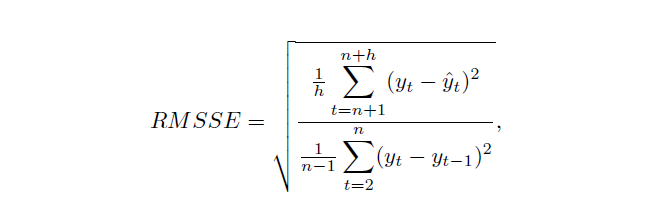

In [34]:
h = 28       # Forecasting For 28 Days
n = 1913     # my Traning Data

In [35]:
def RMSSE(ground_truth, forecast, train_series):
    
    num = ((ground_truth - forecast)**2).sum(axis=1)
    den = 1/(n-1) * ((train_series[:, 1:] - train_series[:, :-1]) ** 2).sum(axis=1)
    rmsse = (1/h * num/den) ** 0.5

    return rmsse

In [36]:
# First 1913 Days Columns

train_series_cols = [c for c in df.columns if c.find("d_") == 0][:-28]
train_series_cols[-5:]

['d_1909', 'd_1910', 'd_1911', 'd_1912', 'd_1913']

In [37]:
# 28 Days Columns

ground_truth_cols = [c for c in df.columns if c.find("d_") == 0][-28:]
ground_truth_cols[-5:]

['d_1937', 'd_1938', 'd_1939', 'd_1940', 'd_1941']

In [38]:
# Forecasting Columns

forecast_cols = [c for c in df.columns if c.find("F_") == 0]
forecast_cols[-5:]

['F_1937', 'F_1938', 'F_1939', 'F_1940', 'F_1941']

In [39]:
# For Level 12 Calculate RMSSE

df["rmsse"] = RMSSE(np.array(df[ground_truth_cols]), 
                   np.array(df[forecast_cols]), np.array(df[train_series_cols]))

df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,Sales_Revenue1904,Sales_Revenue1905,Sales_Revenue1906,Sales_Revenue1907,Sales_Revenue1908,Sales_Revenue1909,Sales_Revenue1910,Sales_Revenue1911,Sales_Revenue1912,Sales_Revenue1913,weight,F_1914,F_1915,F_1916,F_1917,F_1918,F_1919,F_1920,F_1921,F_1922,F_1923,F_1924,F_1925,F_1926,F_1927,F_1928,F_1929,F_1930,F_1931,F_1932,F_1933,F_1934,F_1935,F_1936,F_1937,F_1938,F_1939,F_1940,F_1941,rmsse
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.38,25.14,0.00,8.38,8.38,8.38,25.14,0.00,8.38,8.38,5.001094e-06,0.964286,0.963010,0.997403,1.033025,1.069919,1.108130,1.147706,1.152981,1.194159,1.093951,1.061592,0.992363,1.027804,1.028798,0.994112,1.029616,1.066388,1.104473,1.108204,1.112069,1.044642,1.081951,1.084878,1.087909,1.091049,1.022872,1.059403,1.061525,1.628969
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,3.97,0.00,0.00,0.00,0.00,1.765301e-07,0.071429,0.038265,0.039632,0.041047,0.042513,0.044032,0.045604,0.047233,0.048920,0.050667,0.052477,0.054351,0.056292,0.058302,0.060384,0.062541,0.064775,0.067088,0.069484,0.071966,0.074536,0.077198,0.079955,0.082810,0.050054,0.051841,0.053693,0.055610,0.717095
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5.94,2.97,5.94,2.97,2.97,2.97,0.00,2.97,2.97,2.97,1.056513e-06,0.571429,0.591837,0.612974,0.634866,0.657539,0.681023,0.705345,0.694822,0.719637,0.745338,0.771957,0.763813,0.791092,0.819345,0.848608,0.878915,0.910305,0.907102,0.868070,0.827643,0.821488,0.779398,0.771520,0.763359,0.754908,0.781869,0.774079,0.766010,1.630139
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4.64,0.00,23.20,18.56,4.64,0.00,4.64,13.92,32.48,9.28,5.261220e-06,1.821429,1.886480,1.953854,2.023634,2.095907,2.063618,2.101604,2.105233,2.144706,2.114159,2.153951,2.230878,2.239123,2.140521,2.074111,2.076757,2.150927,2.120603,2.196339,2.239065,2.319032,2.223283,2.159829,2.201252,2.279868,2.325577,2.301491,2.133687,0.678387
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5.76,2.88,2.88,0.00,2.88,2.88,5.76,5.76,5.76,11.52,2.433181e-06,1.357143,1.369898,1.418823,1.326638,1.231161,1.275131,1.284957,1.187991,1.230419,1.238649,1.282886,1.292989,1.339167,1.351280,1.363826,1.341106,1.389002,1.402895,1.417284,1.396473,1.410633,1.425298,1.476202,1.493209,1.510824,1.493353,1.475258,1.456518,0.700044


In [40]:
# For Level 1 to 11 Calculate RMSSE

aggregated_df["rmsse"] = RMSSE(np.array(aggregated_df[ground_truth_cols]), 
                   np.array(aggregated_df[forecast_cols]), np.array(aggregated_df[train_series_cols]))

aggregated_df.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,F_1914,F_1915,F_1916,F_1917,F_1918,F_1919,F_1920,F_1921,F_1922,F_1923,F_1924,F_1925,F_1926,F_1927,F_1928,F_1929,F_1930,F_1931,F_1932,F_1933,F_1934,F_1935,F_1936,F_1937,F_1938,F_1939,F_1940,F_1941,level,weight,rmsse
0,32631.0,31749.0,23783.0,25412.0,19146.0,29211.0,28010.0,37932.0,32736.0,25572.0,23071.0,23658.0,23756.0,26445.0,34833.0,36380.0,21804.0,24070.0,21443.0,20318.0,23721.0,31689.0,29283.0,23966.0,20501.0,20757.0,20277.0,22529.0,29908.0,28707.0,21240.0,22872.0,22046.0,23475.0,23572.0,31202.0,34876.0,24562.0,22752.0,22560.0,...,54308.0,59921.0,42362.0,38777.0,37096.0,36963.0,42552.0,51518.0,54338.0,42272.357143,42494.905612,42803.402241,43176.416607,43479.824343,43406.389498,43075.474837,42598.706081,42676.588442,42783.502314,42913.841683,43085.193172,43080.378642,42606.820736,42205.064334,42197.138060,42308.857277,42562.995037,42742.780574,42776.844165,42577.374314,42253.709111,42403.520151,42576.145871,42834.472509,43113.096527,43205.814260,43000.236198,1,0.083333,1.124758
0,14195.0,13805.0,10108.0,11047.0,9925.0,11322.0,12251.0,16610.0,14696.0,11822.0,10933.0,10350.0,11204.0,11354.0,14610.0,15630.0,9044.0,9496.0,8844.0,7835.0,10025.0,13870.0,13465.0,11997.0,9130.0,8941.0,8514.0,9847.0,13652.0,12491.0,9196.0,9782.0,9537.0,9710.0,10444.0,13784.0,16057.0,10953.0,10299.0,9951.0,...,23037.0,24704.0,17721.0,16150.0,15678.0,16297.0,17430.0,23103.0,24644.0,18006.107143,18096.253827,18195.441463,18332.707230,18430.268202,18412.706352,18278.481579,18053.534493,18048.553582,18107.573353,18189.736687,18287.262997,18307.736675,18129.048699,17917.121867,17932.376220,18030.246799,18152.255613,18262.371885,18334.063738,18254.423157,18083.795413,18120.645249,18204.096865,18313.243182,18449.859010,18498.246831,18379.112790,2,0.036864,1.136477
1,9438.0,9630.0,6778.0,7381.0,5912.0,9006.0,6226.0,9440.0,9376.0,7319.0,6224.0,6740.0,6109.0,7202.0,10081.0,11725.0,6719.0,7460.0,6606.0,6412.0,6711.0,9150.0,9789.0,7297.0,6628.0,5814.0,6175.0,6286.0,8586.0,9086.0,6555.0,7082.0,6145.0,6639.0,6584.0,9238.0,10423.0,7623.0,6335.0,6941.0,...,12366.0,16249.0,12228.0,11370.0,10375.0,9162.0,12303.0,13681.0,14815.0,11046.571429,11073.127551,11171.382106,11255.074325,11324.684122,11305.851412,11241.953248,11141.630150,11164.652655,11189.604536,11220.018983,11242.162518,11259.168323,11184.138620,11090.072142,11087.074719,11110.970244,11161.576324,11192.632622,11206.655215,11161.892902,11070.924791,11113.886391,11120.739476,11175.051600,11231.232014,11253.240301,11217.070311,2,0.022441,0.938705
2,8998.0,8314.0,6897.0,6984.0,3309.0,8883.0,9533.0,11882.0,8664.0,6431.0,5914.0,6568.0,6443.0,7889.0,10142.0,9025.0,6041.0,7114.0,5993.0,6071.0,6985.0,8669.0,6029.0,4672.0,4743.0,6002.0,5588.0,6396.0,7670.0,7130.0,5489.0,6008.0,6364.0,7126.0,6544.0,8180.0,8396.0,5986.0,6118.0,5668.0,...,18905.0,18968.0,12413.0,11257.0,11043.0,11504.0,12819.0,14734.0,14879.0,13219.678571,13325.524235,13436.578672,13588.635053,13724.872019,13687.831734,13555.040010,13403.541439,13463.382205,13486.324426,13504.086013,13555.767656,13513.473644,13293.633417,13197.870325,13177.687122,13167.640234,13249.163099,13287.776067,13236.125212,13161.058255,13098.988907,13168.988511,13251.309530,13346.177727,13432.005503,13454.327128,13404.053097,2,0.024028,1.205195
0,4337.0,4155.0,2816.0,3051.0,2630.0,3276.0,3450.0,5437.0,4340.0,3157.0,2995.0,2710.0,2928.0,3078.0,4316.0,4354.0,2757.0,2430.0,2272.0,2009.0,3015.0,4553.0,3966.0,3264.0,2441.0,2377.0,2414.0,2701.0,3719.0,3548.0,2246.0,2549.0,2559.0,2568.0,2978.0,4096.0,4832.0,3138.0,2997.0,2772.0,...,6245.0,6707.0,4568.0,3949.0,3995.0,4136.0,4433.0,5764.0,6289.0,4569.821429,4593.565051,4622.335231,4668.168633,4689.317512,4678.828852,4636.037025,4569.609776,4560.952982,4578.737018,4600.691911,4634.46

In [42]:
# Calculate WRMSSE

df["wrmsse"] = df["weight"] * df["rmsse"]
aggregated_df["wrmsse"] = aggregated_df["weight"] * aggregated_df["rmsse"]

In [43]:
df["wrmsse"].sum() + aggregated_df["wrmsse"].sum()

1.0970029012597868

**Prediction Part**

In [73]:
all_days_col = [h for h in df.columns if 'd_' in h]
print("First 5 values ",all_days_col[0:5])
print("Last 5 values ",all_days_col[-5:])

df = df[all_days_col]
df.head()

First 5 values  ['d_1', 'd_2', 'd_3', 'd_4', 'd_5']
Last 5 values  ['d_1965', 'd_1966', 'd_1967', 'd_1968', 'd_1969']


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,4,0,0,0,0,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,0,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,1,1,1,1,0,4,0,1,3,0,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,2,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
# Add Test Data

for day in range(1942,1970):
  df['d_' + str(day)] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [75]:
df.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,4,0,0,0,0,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,0,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,1,1,1,1,0,4,0,1,3,0,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,2,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
all_days_col = [h for h in df.columns if 'd_' in h]
print("First 5 values ",all_days_col[0:5])
print("Last 5 values ",all_days_col[-5:])

df = df[all_days_col]
df.head()

First 5 values  ['d_1', 'd_2', 'd_3', 'd_4', 'd_5']
Last 5 values  ['d_1965', 'd_1966', 'd_1967', 'd_1968', 'd_1969']


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,4,0,0,0,0,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,0,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,1,1,1,1,0,4,0,1,3,0,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,2,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
train_data = df[all_days_col[:1941]]
train_data.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


In [78]:
val_data = df[all_days_col[1941:]]
val_data.head()

,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
def simple_Moving_Average(train_data,  forecast_days,window_Size):

    predictions = []
    for i in range(forecast_days):
        # All Data Avilabel in Trainin Data
        if i == 0:
            predictions.append(np.mean(train_data[train_data.columns[-window_Size:]].values, axis=1))
        if i < forecast_days and i > 0:
            predictions.append((np.sum(train_data[train_data.columns[-window_Size + i:]].values, axis=1) + \
                                  np.sum(predictions[:i], axis=0))/forecast_days)
            
    return predictions

In [80]:
forecast_days = 28
window_Size = 28
predictions = simple_Moving_Average(train_data, forecast_days, window_Size)

In [81]:
for d, i in enumerate(range(1942, 1970)):
    val_data['d_' + str(i)] = predictions[d]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
val_data

,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,1.178571,1.220663,1.264258,1.309410,1.284747,1.330630,1.271010,1.137832,1.178469,1.220557,1.228434,1.236592,1.280756,1.255069,1.264179,1.237899,1.210681,1.218206,1.261713,1.235346,1.136608,1.177201,1.219244,1.262788,1.307888,1.247455,1.184865,1.227181
1,0.250000,0.258929,0.232462,0.240764,0.249363,0.258268,0.267492,0.277046,0.286940,0.297188,0.272088,0.281805,0.291869,0.302293,0.313090,0.324271,0.335852,0.347847,0.360270,0.373137,0.350749,0.291847,0.266556,0.240362,0.248946,0.257837,0.267045,0.276583
2,0.750000,0.776786,0.804528,0.797547,0.790316,0.818542,0.776347,0.768360,0.795801,0.824222,0.853659,0.884147,0.844295,0.838734,0.761546,0.788744,0.816913,0.810375,0.839316,0.833578,0.863348,0.822754,0.852138,0.882571,0.914092,0.875309,0.799427,0.827978
3,1.750000,1.812500,1.877232,1.908562,1.905296,1.830485,1.860146,1.712294,1.630590,1.688825,1.749140,1.811610,1.804881,1.797913,1.719267,1.709241,1.734571,1.760805,1.787977,1.816119,1.845266,1.911169,1.836567,1.902159,1.934379,1.896321,1.964047,1.962763
4,1.392857,1.406888,1.457134,1.437746,1.381951,1.395592,1.445435,1.389914,1.368126,1.309844,1.320910,1.332371,1.272813,1.246842,1.184229,1.155095,1.124920,1.093667,1.061298,1.099201,1.138458,1.179118,1.149800,1.155150,1.196406,1.239134,1.211961,1.219531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0.642857,0.665816,0.689595,0.714224,0.668303,0.620743,0.642912,0.665873,0.689654,0.642856,0.665816,0.689595,0.678509,0.667027,0.655135,0.678533,0.702766,0.692151,0.716870,0.706758,0.732000,0.651000,0.674250,0.662616,0.650566,0.673801,0.697865,0.687075
30486,0.285714,0.295918,0.270773,0.244729,0.217755,0.225532,0.233586,0.241929,0.250569,0.223804,0.231797,0.168647,0.174670,0.180908,0.187369,0.194061,0.200991,0.208170,0.215604,0.223304,0.231280,0.239540,0.248095,0.256955,0.266132,0.239923,0.248491,0.221652
30487,0.785714,0.813776,0.842839,0.837226,0.831413,0.861106,0.820431,0.814018,0.807376,0.836211,0.866075,0.861292,0.892053,0.923912,0.921194,0.954094,0.881026,0.805348,0.798397,0.826911,0.856443,0.851316,0.810292,0.839231,0.833489,0.863257,0.858373,0.889029
30488,1.321429,1.332908,1.273369,1.318847,1.330234,1.306314,1.317254,1.364298,1.341595,1.353795,1.366430,1.343803,1.391796,1.370074,1.383291,1.396980,1.446872,1.427117,1.442372,1.458171,1.474534,1.491481,1.401891,1.237673,1.281876,1.291943,1.302369,1.313168


In [91]:
p1 = pd.concat([IDS, val_data], axis=1, sort=False)
p1

,id,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_evaluation,1.178571,1.220663,1.264258,1.309410,1.284747,1.330630,1.271010,1.137832,1.178469,1.220557,1.228434,1.236592,1.280756,1.255069,1.264179,1.237899,1.210681,1.218206,1.261713,1.235346,1.136608,1.177201,1.219244,1.262788,1.307888,1.247455,1.184865,1.227181
1,HOBBIES_1_002_CA_1_evaluation,0.250000,0.258929,0.232462,0.240764,0.249363,0.258268,0.267492,0.277046,0.286940,0.297188,0.272088,0.281805,0.291869,0.302293,0.313090,0.324271,0.335852,0.347847,0.360270,0.373137,0.350749,0.291847,0.266556,0.240362,0.248946,0.257837,0.267045,0.276583
2,HOBBIES_1_003_CA_1_evaluation,0.750000,0.776786,0.804528,0.797547,0.790316,0.818542,0.776347,0.768360,0.795801,0.824222,0.853659,0.884147,0.844295,0.838734,0.761546,0.788744,0.816913,0.810375,0.839316,0.833578,0.863348,0.822754,0.852138,0.882571,0.914092,0.875309,0.799427,0.827978
3,HOBBIES_1_004_CA_1_evaluation,1.750000,1.812500,1.877232,1.908562,1.905296,1.830485,1.860146,1.712294,1.630590,1.688825,1.749140,1.811610,1.804881,1.797913,1.719267,1.709241,1.734571,1.760805,1.787977,1.816119,1.845266,1.911169,1.836567,1.902159,1.934379,1.896321,1.964047,1.962763
4,HOBBIES_1_005_CA_1_evaluation,1.392857,1.406888,1.457134,1.437746,1.381951,1.395592,1.445435,1.389914,1.368126,1.309844,1.320910,1.332371,1.272813,1.246842,1.184229,1.155095,1.124920,1.093667,1.061298,1.099201,1.138458,1.179118,1.149800,1.155150,1.196406,1.239134,1.211961,1.219531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,0.642857,0.665816,0.689595,0.714224,0.668303,0.620743,0.642912,0.665873,0.689654,0.642856,0.665816,0.689595,0.678509,0.667027,0.655135,0.678533,0.702766,0.692151,0.716870,0.706758,0.732000,0.651000,0.674250,0.662616,0.650566,0.673801,0.697865,0.687075
30486,FOODS_3_824_WI_3_evaluation,0.285714,0.295918,0.270773,0.244729,0.217755,0.225532,0.233586,0.241929,0.250569,0.223804,0.231797,0.168647,0.174670,0.180908,0.187369,0.194061,0.200991,0.208170,0.215604,0.223304,0.231280,0.239540,0.248095,0.256955,0.266132,0.239923,0.248491,0.221652
30487,FOODS_3_825_WI_3_evaluation,0.785714,0.813776,0.842839,0.837226,0.831413,0.861106,0.820431,0.814018,0.807376,0.836211,0.866075,0.861292,0.892053,0.923912,0.921194,0.954094,0.881026,0.805348,0.798397,0.826911,0.856443,0.851316,0.810292,0.839231,0.833489,0.863257,0.858373,0.889029
30488,FOODS_3_826_WI_3_evaluation,1.321429,1.332908,1.273369,1.318847,1.330234,1.306314,1.317254,1.364298,1.341595,1.353795,1.366430,1.343803,1.391796,1.370074,1.383291,1.396980,1.446872,1.427117,1.442372,1.458171,1.474534,1.491481,1.401891,1.237673,1.281876,1.291943,1.302369,1.313168


In [92]:
p2 = p1.copy()

p2["id"] = p1["id"].str.replace("evaluation$", "validation")
p2

,id,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_validation,1.178571,1.220663,1.264258,1.309410,1.284747,1.330630,1.271010,1.137832,1.178469,1.220557,1.228434,1.236592,1.280756,1.255069,1.264179,1.237899,1.210681,1.218206,1.261713,1.235346,1.136608,1.177201,1.219244,1.262788,1.307888,1.247455,1.184865,1.227181
1,HOBBIES_1_002_CA_1_validation,0.250000,0.258929,0.232462,0.240764,0.249363,0.258268,0.267492,0.277046,0.286940,0.297188,0.272088,0.281805,0.291869,0.302293,0.313090,0.324271,0.335852,0.347847,0.360270,0.373137,0.350749,0.291847,0.266556,0.240362,0.248946,0.257837,0.267045,0.276583
2,HOBBIES_1_003_CA_1_validation,0.750000,0.776786,0.804528,0.797547,0.790316,0.818542,0.776347,0.768360,0.795801,0.824222,0.853659,0.884147,0.844295,0.838734,0.761546,0.788744,0.816913,0.810375,0.839316,0.833578,0.863348,0.822754,0.852138,0.882571,0.914092,0.875309,0.799427,0.827978
3,HOBBIES_1_004_CA_1_validation,1.750000,1.812500,1.877232,1.908562,1.905296,1.830485,1.860146,1.712294,1.630590,1.688825,1.749140,1.811610,1.804881,1.797913,1.719267,1.709241,1.734571,1.760805,1.787977,1.816119,1.845266,1.911169,1.836567,1.902159,1.934379,1.896321,1.964047,1.962763
4,HOBBIES_1_005_CA_1_validation,1.392857,1.406888,1.457134,1.437746,1.381951,1.395592,1.445435,1.389914,1.368126,1.309844,1.320910,1.332371,1.272813,1.246842,1.184229,1.155095,1.124920,1.093667,1.061298,1.099201,1.138458,1.179118,1.149800,1.155150,1.196406,1.239134,1.211961,1.219531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,0.642857,0.665816,0.689595,0.714224,0.668303,0.620743,0.642912,0.665873,0.689654,0.642856,0.665816,0.689595,0.678509,0.667027,0.655135,0.678533,0.702766,0.692151,0.716870,0.706758,0.732000,0.651000,0.674250,0.662616,0.650566,0.673801,0.697865,0.687075
30486,FOODS_3_824_WI_3_validation,0.285714,0.295918,0.270773,0.244729,0.217755,0.225532,0.233586,0.241929,0.250569,0.223804,0.231797,0.168647,0.174670,0.180908,0.187369,0.194061,0.200991,0.208170,0.215604,0.223304,0.231280,0.239540,0.248095,0.256955,0.266132,0.239923,0.248491,0.221652
30487,FOODS_3_825_WI_3_validation,0.785714,0.813776,0.842839,0.837226,0.831413,0.861106,0.820431,0.814018,0.807376,0.836211,0.866075,0.861292,0.892053,0.923912,0.921194,0.954094,0.881026,0.805348,0.798397,0.826911,0.856443,0.851316,0.810292,0.839231,0.833489,0.863257,0.858373,0.889029
30488,FOODS_3_826_WI_3_validation,1.321429,1.332908,1.273369,1.318847,1.330234,1.306314,1.317254,1.364298,1.341595,1.353795,1.366430,1.343803,1.391796,1.370074,1.383291,1.396980,1.446872,1.427117,1.442372,1.458171,1.474534,1.491481,1.401891,1.237673,1.281876,1.291943,1.302369,1.313168


In [93]:
p3 = pd.concat([p1, p2], axis=0, sort=False)
p3

,id,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_evaluation,1.178571,1.220663,1.264258,1.309410,1.284747,1.330630,1.271010,1.137832,1.178469,1.220557,1.228434,1.236592,1.280756,1.255069,1.264179,1.237899,1.210681,1.218206,1.261713,1.235346,1.136608,1.177201,1.219244,1.262788,1.307888,1.247455,1.184865,1.227181
1,HOBBIES_1_002_CA_1_evaluation,0.250000,0.258929,0.232462,0.240764,0.249363,0.258268,0.267492,0.277046,0.286940,0.297188,0.272088,0.281805,0.291869,0.302293,0.313090,0.324271,0.335852,0.347847,0.360270,0.373137,0.350749,0.291847,0.266556,0.240362,0.248946,0.257837,0.267045,0.276583
2,HOBBIES_1_003_CA_1_evaluation,0.750000,0.776786,0.804528,0.797547,0.790316,0.818542,0.776347,0.768360,0.795801,0.824222,0.853659,0.884147,0.844295,0.838734,0.761546,0.788744,0.816913,0.810375,0.839316,0.833578,0.863348,0.822754,0.852138,0.882571,0.914092,0.875309,0.799427,0.827978
3,HOBBIES_1_004_CA_1_evaluation,1.750000,1.812500,1.877232,1.908562,1.905296,1.830485,1.860146,1.712294,1.630590,1.688825,1.749140,1.811610,1.804881,1.797913,1.719267,1.709241,1.734571,1.760805,1.787977,1.816119,1.845266,1.911169,1.836567,1.902159,1.934379,1.896321,1.964047,1.962763
4,HOBBIES_1_005_CA_1_evaluation,1.392857,1.406888,1.457134,1.437746,1.381951,1.395592,1.445435,1.389914,1.368126,1.309844,1.320910,1.332371,1.272813,1.246842,1.184229,1.155095,1.124920,1.093667,1.061298,1.099201,1.138458,1.179118,1.149800,1.155150,1.196406,1.239134,1.211961,1.219531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,0.642857,0.665816,0.689595,0.714224,0.668303,0.620743,0.642912,0.665873,0.689654,0.642856,0.665816,0.689595,0.678509,0.667027,0.655135,0.678533,0.702766,0.692151,0.716870,0.706758,0.732000,0.651000,0.674250,0.662616,0.650566,0.673801,0.697865,0.687075
30486,FOODS_3_824_WI_3_validation,0.285714,0.295918,0.270773,0.244729,0.217755,0.225532,0.233586,0.241929,0.250569,0.223804,0.231797,0.168647,0.174670,0.180908,0.187369,0.194061,0.200991,0.208170,0.215604,0.223304,0.231280,0.239540,0.248095,0.256955,0.266132,0.239923,0.248491,0.221652
30487,FOODS_3_825_WI_3_validation,0.785714,0.813776,0.842839,0.837226,0.831413,0.861106,0.820431,0.814018,0.807376,0.836211,0.866075,0.861292,0.892053,0.923912,0.921194,0.954094,0.881026,0.805348,0.798397,0.826911,0.856443,0.851316,0.810292,0.839231,0.833489,0.863257,0.858373,0.889029
30488,FOODS_3_826_WI_3_validation,1.321429,1.332908,1.273369,1.318847,1.330234,1.306314,1.317254,1.364298,1.341595,1.353795,1.366430,1.343803,1.391796,1.370074,1.383291,1.396980,1.446872,1.427117,1.442372,1.458171,1.474534,1.491481,1.401891,1.237673,1.281876,1.291943,1.302369,1.313168


In [94]:
p3.columns = ['id'] + ['F' + str(c) for c in np.arange(1,29,1)]

In [95]:
p3

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_evaluation,1.178571,1.220663,1.264258,1.309410,1.284747,1.330630,1.271010,1.137832,1.178469,1.220557,1.228434,1.236592,1.280756,1.255069,1.264179,1.237899,1.210681,1.218206,1.261713,1.235346,1.136608,1.177201,1.219244,1.262788,1.307888,1.247455,1.184865,1.227181
1,HOBBIES_1_002_CA_1_evaluation,0.250000,0.258929,0.232462,0.240764,0.249363,0.258268,0.267492,0.277046,0.286940,0.297188,0.272088,0.281805,0.291869,0.302293,0.313090,0.324271,0.335852,0.347847,0.360270,0.373137,0.350749,0.291847,0.266556,0.240362,0.248946,0.257837,0.267045,0.276583
2,HOBBIES_1_003_CA_1_evaluation,0.750000,0.776786,0.804528,0.797547,0.790316,0.818542,0.776347,0.768360,0.795801,0.824222,0.853659,0.884147,0.844295,0.838734,0.761546,0.788744,0.816913,0.810375,0.839316,0.833578,0.863348,0.822754,0.852138,0.882571,0.914092,0.875309,0.799427,0.827978
3,HOBBIES_1_004_CA_1_evaluation,1.750000,1.812500,1.877232,1.908562,1.905296,1.830485,1.860146,1.712294,1.630590,1.688825,1.749140,1.811610,1.804881,1.797913,1.719267,1.709241,1.734571,1.760805,1.787977,1.816119,1.845266,1.911169,1.836567,1.902159,1.934379,1.896321,1.964047,1.962763
4,HOBBIES_1_005_CA_1_evaluation,1.392857,1.406888,1.457134,1.437746,1.381951,1.395592,1.445435,1.389914,1.368126,1.309844,1.320910,1.332371,1.272813,1.246842,1.184229,1.155095,1.124920,1.093667,1.061298,1.099201,1.138458,1.179118,1.149800,1.155150,1.196406,1.239134,1.211961,1.219531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,0.642857,0.665816,0.689595,0.714224,0.668303,0.620743,0.642912,0.665873,0.689654,0.642856,0.665816,0.689595,0.678509,0.667027,0.655135,0.678533,0.702766,0.692151,0.716870,0.706758,0.732000,0.651000,0.674250,0.662616,0.650566,0.673801,0.697865,0.687075
30486,FOODS_3_824_WI_3_validation,0.285714,0.295918,0.270773,0.244729,0.217755,0.225532,0.233586,0.241929,0.250569,0.223804,0.231797,0.168647,0.174670,0.180908,0.187369,0.194061,0.200991,0.208170,0.215604,0.223304,0.231280,0.239540,0.248095,0.256955,0.266132,0.239923,0.248491,0.221652
30487,FOODS_3_825_WI_3_validation,0.785714,0.813776,0.842839,0.837226,0.831413,0.861106,0.820431,0.814018,0.807376,0.836211,0.866075,0.861292,0.892053,0.923912,0.921194,0.954094,0.881026,0.805348,0.798397,0.826911,0.856443,0.851316,0.810292,0.839231,0.833489,0.863257,0.858373,0.889029
30488,FOODS_3_826_WI_3_validation,1.321429,1.332908,1.273369,1.318847,1.330234,1.306314,1.317254,1.364298,1.341595,1.353795,1.366430,1.343803,1.391796,1.370074,1.383291,1.396980,1.446872,1.427117,1.442372,1.458171,1.474534,1.491481,1.401891,1.237673,1.281876,1.291943,1.302369,1.313168


In [96]:
p3.to_csv("Base_Model.csv",index=False)

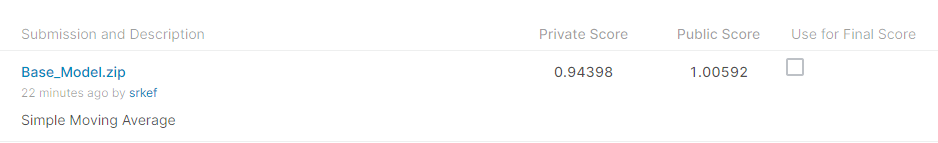

In [ ]:
# This Is Base Model,Less Score Then This is not Acceptable.